In [31]:
import matplotlib.pyplot as plt
import os
workdir = os.getcwd()
print(('INFO: Your current working directory is: %s' % workdir))

INFO: Your current working directory is: /data/users/lipengfei/amber_tutorials/MDforIL2/DEShaw/run3/analysis_clustering


# DBScan clustering algorithm

In [32]:
def read_kdist_file(kdist_dat):
    frames = []
    kdist = []
    with open(kdist_dat) as f:
        lines = f.readlines()
        for line in lines[1:]:
            _frame, _kdist = line.split()
            frames.append(float(_frame))
            kdist.append(float(_kdist))
    return frames, kdist

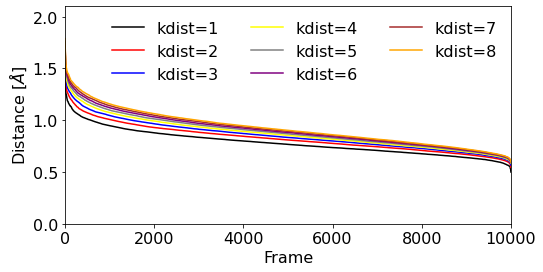

In [33]:
frames, kdist1 = read_kdist_file(kdist_dat='./dbscan/Kdist.1.dat')
frames, kdist2 = read_kdist_file(kdist_dat='./dbscan/Kdist.2.dat')
frames, kdist3 = read_kdist_file(kdist_dat='./dbscan/Kdist.3.dat')
frames, kdist4 = read_kdist_file(kdist_dat='./dbscan/Kdist.4.dat')
frames, kdist5 = read_kdist_file(kdist_dat='./dbscan/Kdist.5.dat')
frames, kdist6 = read_kdist_file(kdist_dat='./dbscan/Kdist.6.dat')
frames, kdist7 = read_kdist_file(kdist_dat='./dbscan/Kdist.7.dat')
frames, kdist8 = read_kdist_file(kdist_dat='./dbscan/Kdist.8.dat')
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 10010
ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 2.1
ax.set_ylim([ymin, ymax])
plt.plot(frames[::1], kdist1[::1], color='black',  label='kdist=1')
plt.plot(frames[::1], kdist2[::1], color='red',    label='kdist=2')
plt.plot(frames[::1], kdist3[::1], color='blue',   label='kdist=3')
plt.plot(frames[::1], kdist4[::1], color='yellow', label='kdist=4')
plt.plot(frames[::1], kdist5[::1], color='grey',   label='kdist=5')
plt.plot(frames[::1], kdist6[::1], color='purple', label='kdist=6')
plt.plot(frames[::1], kdist7[::1], color='brown',  label='kdist=7')
plt.plot(frames[::1], kdist8[::1], color='orange', label='kdist=8')
plt.xlabel(r'Frame', fontsize=16)
plt.ylabel(r'Distance [$\AA$]', fontsize=16)
plt.xticks(np.arange(0, 10010, 2000))
plt.yticks(np.arange(0, 2.1, 0.5))
ax.tick_params(labelsize=16)
plt.legend(loc='upper right', fontsize=16, frameon=False, ncol=3)
plt.show()

# Comparison of the Various Clustering Algorithms

| Algorithm    | DBI   | pSF      | SSR/SST | Cluster size     |
| :---         | :---  | :---     | :---    | :---             |
| dbscan       | 1.858 | 1492.988 | 0.465   | 4359, 2885, 1062 |
| k-means      | 1.650 | 1519.720 | 0.578   | 2999, 1655, 1647 |
| hierarchical | 1.682 |  926.289 | 0.455   | 4627, 3772,  452 |

 The DBI and psF values are metrics of clustering quality; low values of DBI and high values of pSF indicate better results.
 
 The R-squared (SSR/SST) value represents the percentage of variance explained by the data.
 
 We can see from the data that the k-means and dbscan algorithms perform very similarly. The cluster size for the first three most populated clusters are shown here. We could think that k-means is somewhat more appropriate for this particular dataset

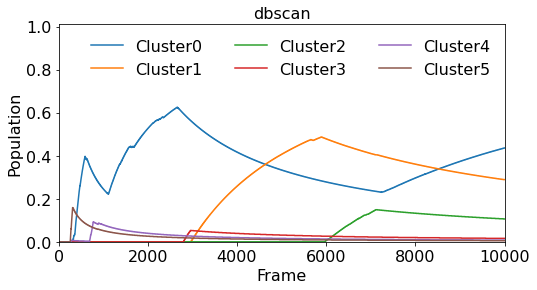

In [34]:
input_file = './dbscan/clusterspop_vs_time.agr'
x, y = np.loadtxt(input_file, comments="@", unpack=True)
k = 0
with open(input_file) as f:
    lines = f.readlines()
    for line in lines[1:]:
        # count the number of sub-lines
        if line.startswith("@  s"):
            k = k+1
interval = int(len(x)/k)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 10010
ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 1.01
ax.set_ylim([ymin, ymax])
for i in range(k):
    start = i*interval
    end = (i+1)*interval
    plt.plot(x[start:end], y[start:end], label='Cluster%s'%(i))
plt.xlabel(r'Frame', fontsize=16)
plt.ylabel(r'Population', fontsize=16)
plt.xticks(np.arange(0, 10010, 2000))
plt.yticks(np.arange(0, 1.01, 0.2))
ax.tick_params(labelsize=16)
plt.legend(loc='upper right', fontsize=16, frameon=False, ncol=3)
plt.title('dbscan', fontsize=16)
plt.show()

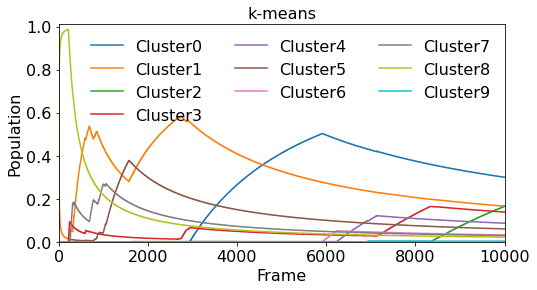

In [35]:
input_file = './k-means/clusterspop_vs_time.agr'
x, y = np.loadtxt(input_file, comments="@", unpack=True)
k = 0
with open(input_file) as f:
    lines = f.readlines()
    for line in lines[1:]:
        # count the number of sub-lines
        if line.startswith("@  s"):
            k = k+1
interval = int(len(x)/k)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 10010
ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 1.01
ax.set_ylim([ymin, ymax])
for i in range(k):
    start = i*interval
    end = (i+1)*interval
    plt.plot(x[start:end], y[start:end], label='Cluster%s'%(i))
plt.xlabel(r'Frame', fontsize=16)
plt.ylabel(r'Population', fontsize=16)
plt.xticks(np.arange(0, 10010, 2000))
plt.yticks(np.arange(0, 1.01, 0.2))
ax.tick_params(labelsize=16)
plt.legend(loc='upper right', fontsize=16, frameon=False, ncol=3)
plt.title('k-means', fontsize=16)
plt.show()

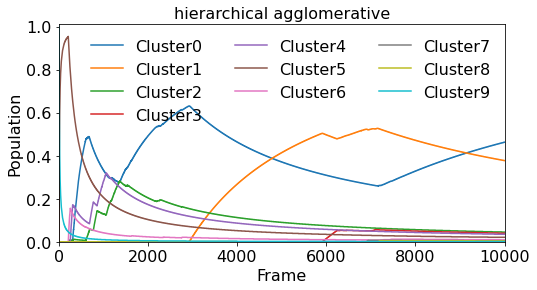

In [36]:
input_file = './hierarchical_agglomerative/clusterspop_vs_time.agr'
x, y = np.loadtxt(input_file, comments="@", unpack=True)
k = 0
with open(input_file) as f:
    lines = f.readlines()
    for line in lines[1:]:
        # count the number of sub-lines
        if line.startswith("@  s"):
            k = k+1
interval = int(len(x)/k)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 10010
ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 1.01
ax.set_ylim([ymin, ymax])
for i in range(k):
    start = i*interval
    end = (i+1)*interval
    plt.plot(x[start:end], y[start:end], label='Cluster%s'%(i))
plt.xlabel(r'Frame', fontsize=16)
plt.ylabel(r'Population', fontsize=16)
plt.xticks(np.arange(0, 10010, 2000))
plt.yticks(np.arange(0, 1.01, 0.2))
ax.tick_params(labelsize=16)
plt.legend(loc='upper right', fontsize=16, frameon=False, ncol=3)
plt.title('hierarchical agglomerative', fontsize=16)
plt.show()

In particular, one can see that at the beginning of the trajectory the cluster populations are changing rapidly over time. As the run progresses, the cluster populations gradually stabilize until they reach their final total frames. This is an indication that the cluster populations are reaching an equilibrium and the results may be suitable for things like thermodynamic analysis. We can also see the similarities with the k-means and hierarchical agglomerative clustering method, where some clusters are almost the same population.